In [1]:
import pandas as pd
from matplotlib import pyplot, ticker
import pybaselines
import scipy.io
import numpy as np

In [2]:
# tick
pyplot.rcParams["xtick.bottom"] = True  # 下軸目盛の表示
pyplot.rcParams["xtick.top"] = True  # 上軸目盛の表示
pyplot.rcParams["ytick.left"] = True  # 左軸目盛の表示
pyplot.rcParams["ytick.right"] = True  # 右軸目盛の表示
pyplot.rcParams["xtick.direction"] = "in"  # 縦軸目盛の向き
pyplot.rcParams["ytick.direction"] = "in"  # 横軸目盛の向き
pyplot.rcParams["xtick.major.size"] = 10  # 横軸主目盛の長さ
pyplot.rcParams["ytick.major.size"] = 10  # 縦軸主目盛の長さ
pyplot.rcParams["xtick.minor.size"] = 5  # 横軸副目盛の長さ
pyplot.rcParams["ytick.minor.size"] = 5  # 縦軸副目盛の長さ
# line
pyplot.rcParams["lines.linewidth"] = 2  # 折れ線グラフの太さ
pyplot.rcParams["axes.linewidth"] = 2  # 軸線の太さ
pyplot.rcParams["xtick.major.width"] = 2  # 横軸主目盛の太さ
pyplot.rcParams["ytick.major.width"] = 2  # 縦軸主目盛の太さ
pyplot.rcParams["xtick.minor.width"] = 2  # 横軸副目盛の太さ
pyplot.rcParams["ytick.minor.width"] = 2  # 縦軸副目盛の太さ
# pad
pyplot.rcParams["axes.labelpad"] = 5  # タイトルの軸からの距離
pyplot.rcParams["xtick.major.pad"] = 10  # 横軸目盛の軸からの距離
pyplot.rcParams["ytick.major.pad"] = 10  # 縦軸目盛の軸からの距離
# save
pyplot.rcParams["savefig.format"] = "png"
pyplot.rcParams["savefig.dpi"] = 150
pyplot.rcParams["savefig.transparent"] = False
pyplot.rcParams["savefig.bbox"] = "tight"
# フォント
pyplot.rcParams["font.size"] = "20"  # フォントサイズ
font = 3  # フォント指定
if font == 1: pyplot.rcParams["font.family"] = "Times New Roman"  # セリフフォント
if font == 2: pyplot.rcParams["font.family"] = "Arial"  # サンセリフフォント
if font == 3: pyplot.rcParams["font.family"] = "Meiryo"  # 日本語フォント
print("size =", pyplot.rcParams["font.size"], "\nfont =", pyplot.rcParams["font.family"][0])


size = 20.0 
font = Meiryo


In [4]:
Dictionary1 = scipy.io.loadmat('file')
data_file = 'file'

data = pd.read_csv(data_file, header=0, index_col=0)


Spectra1 = Dictionary1["initial_Bleachedhair_2"]
Spectra2 = Dictionary1["ESVirginhair"]
x = data.index.astype(float)
x = x[1556:2386]
x = sorted(x, reverse=True)


findfont: Font family ['Meiryo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Meiryo'] not found. Falling back to DejaVu Sans.


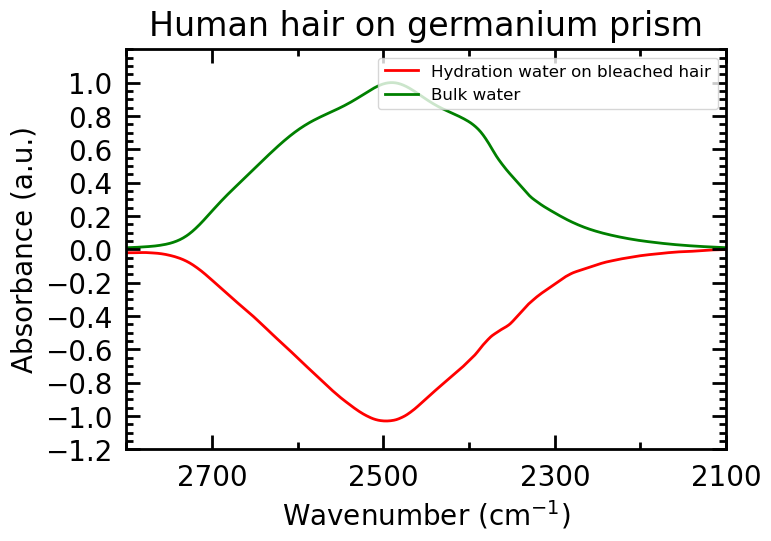

In [5]:
fig = pyplot.figure(figsize=(6, 4))  # 図の大きさ
ax1 = fig.add_axes((0, 0, 1, 1))  # (left, top, width, height)
ax1.set_axisbelow(False)  # True: プロットが軸の上, False: 軸がプロットの上

ax1.plot(x, Spectra1[1, :], c="red", label="Hydration water on bleached hair")  # 折れ線グラフ
#ax1.plot(x, Spectra2[:, 0]-pybaselines.spline.pspline_airpls(Spectra2[:, 0], lam=1e4)[0], c="blue", label="Hydration water on virgin hair")  # 折れ線グラフ
ax1.plot(x, Spectra1[0, :], c="green", label="Bulk water") 
#ax1.plot(x, (y1 - bkg_1_y1)/max(y1 - bkg_1_y1), c="red", label="Hydration water on bleached hair") 
#ax1.plot(x, (y2 - bkg_1_y2)/max(y2 - bkg_1_y2), c="blue", label="Hydration water on virgin hair")  # 折れ線グラフ

# 矢印
buff = pyplot.rcParams["font.size"]
pyplot.rcParams["font.size"] = 18
px, py = 3400, 1.32
ax1.annotate("3400", (px+150, py+0.19))
ax1.annotate("", xy=(px, py), xytext=(px, py+0.16), arrowprops=dict(width=0.8, headwidth=5, headlength=10, color="black"))
pyplot.rcParams["font.size"] = buff

# ax1.scatter(data.columns, data.iloc[0], c="red", s=10, label="legend")  # 散布図
ax1.legend(bbox_to_anchor=(1, 1), loc="upper right", frameon=True, fontsize=12)  # 凡例表示
ax1.set_title("Human hair on germanium prism", pad=10)  # タイトル表示

ax1.set_xlim(2800, 2100)  # 横軸の範囲
ax1.set_xticks(np.arange(2100, 2800, 200))  # 横軸の主目盛
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))  # 横軸の副目盛
ax1.set_xlabel("Wavenumber (cm$^{-1}$)")  # 横軸のタイトル

ax1.set_ylim(-1.2, 1.2)  # 縦軸の範囲
ax1.set_yticks(np.arange(-1.2, 1.2, 0.2))  # 縦軸の主目盛
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))  # 縦軸の副目盛
ax1.set_ylabel("Absorbance (a.u.)")  # 縦軸のタイトル

# ax2 = ax1.twinx()  # 右軸の設定


pyplot.show()

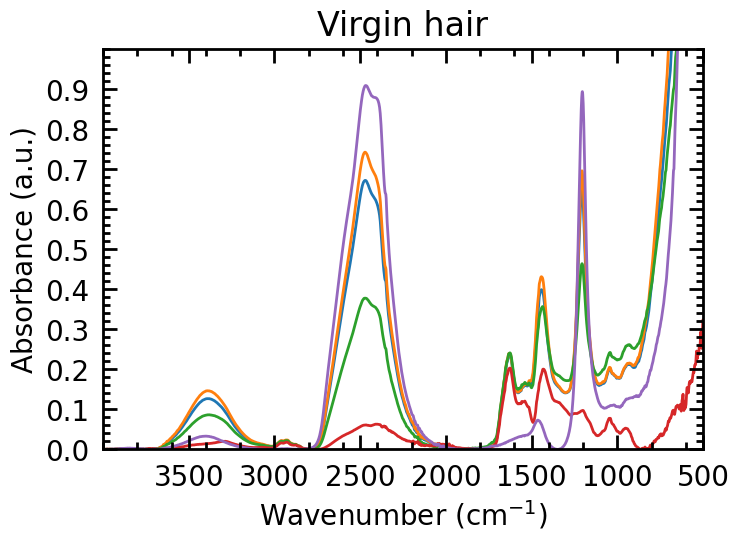

In [43]:
data_file = 'file'
data = pd.read_csv(data_file, header=0, index_col=0)

z = data.values.T
#y = data.columns.astype(float)
x = data.index.astype(float)

fig = pyplot.figure(figsize=(6, 4))  # 図の大きさ
ax1 = fig.add_axes((0, 0, 1, 1))  # (left, top, width, height)
ax1.set_axisbelow(False)  # True: プロットが軸の上, False: 軸がプロットの上



for i in range(len(data.T)):
   ax1.plot(x, z.T[:, i])  # 折れ線グラフ

ax1.annotate("3400", (px+150, py+0.19))
ax1.annotate("", xy=(px, py), xytext=(px, py+0.16), arrowprops=dict(width=0.8, headwidth=5, headlength=10, color="black"))
pyplot.rcParams["font.size"] = buff

#ax1.scatter(data.columns, data.iloc[0], c="red", s=10, label="legend")  # 散布図
#ax1.legend(bbox_to_anchor=(1, 1), loc="upper right", frameon=True, fontsize=15)  # 凡例表示
ax1.set_title("Virgin hair", pad=10)  # タイトル表示
ax1.set_xlim(4000, 500)  # 横軸の範囲
ax1.set_xticks(np.arange(500, 4000, 500))  # 横軸の主目盛
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(200))  # 横軸の副目盛
ax1.set_xlabel("Wavenumber (cm$^{-1}$)")  # 横軸のタイトル

ax1.set_ylim(0, 1.0)  # 縦軸の範囲
ax1.set_yticks(np.arange(0, 1.0, 0.1))  # 縦軸の主目盛
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))  # 縦軸の副目盛
ax1.set_ylabel("Absorbance (a.u.)")  # 縦軸のタイトル



# ax2 = ax1.twinx()  # 右軸の設定

pyplot.show()

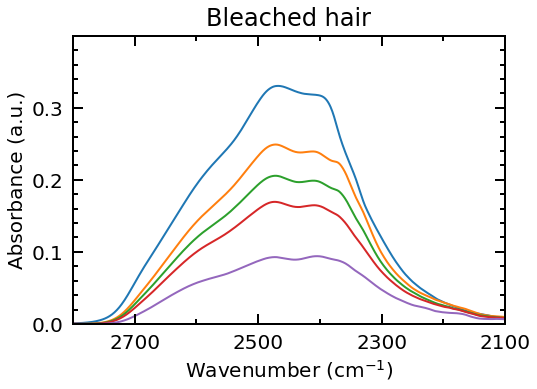

In [ ]:
data_file = 'file'

data = pd.read_csv(data_file, header=0, index_col=0)

z = data.values.T
#y = data.columns.astype(float)
x = data.index.astype(float)

fig = pyplot.figure(figsize=(6, 4))  # 図の大きさ
ax1 = fig.add_axes((0, 0, 1, 1))  # (left, top, width, height)
ax1.set_axisbelow(False)  # True: プロットが軸の上, False: 軸がプロットの上



for i in range(len(data.T)):
   ax1.plot(x, z.T[:, i])  # 折れ線グラフ

ax1.annotate("3400", (px+150, py+0.19))
ax1.annotate("", xy=(px, py), xytext=(px, py+0.16), arrowprops=dict(width=0.8, headwidth=5, headlength=10, color="black"))
pyplot.rcParams["font.size"] = buff

#ax1.scatter(data.columns, data.iloc[0], c="red", s=10, label="legend")  # 散布図
#ax1.legend(bbox_to_anchor=(1, 1), loc="upper right", frameon=True, fontsize=15)  # 凡例表示
ax1.set_title("Bleached hair", pad=10)  # タイトル表示
ax1.set_xlim(2800, 2100)  # 横軸の範囲
ax1.set_xticks(np.arange(2100, 2800, 200))  # 横軸の主目盛
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(200))  # 横軸の副目盛
ax1.set_xlabel("Wavenumber (cm$^{-1}$)")  # 横軸のタイトル

ax1.set_ylim(0, 0.4)  # 縦軸の範囲
ax1.set_yticks(np.arange(0, 0.4, 0.1))  # 縦軸の主目盛
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))  # 縦軸の副目盛
ax1.set_ylabel("Absorbance (a.u.)")  # 縦軸のタイトル



# ax2 = ax1.twinx()  # 右軸の設定


pyplot.show()